In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
dataset = pd.read_csv("Assignment_1.csv")

<AxesSubplot:>

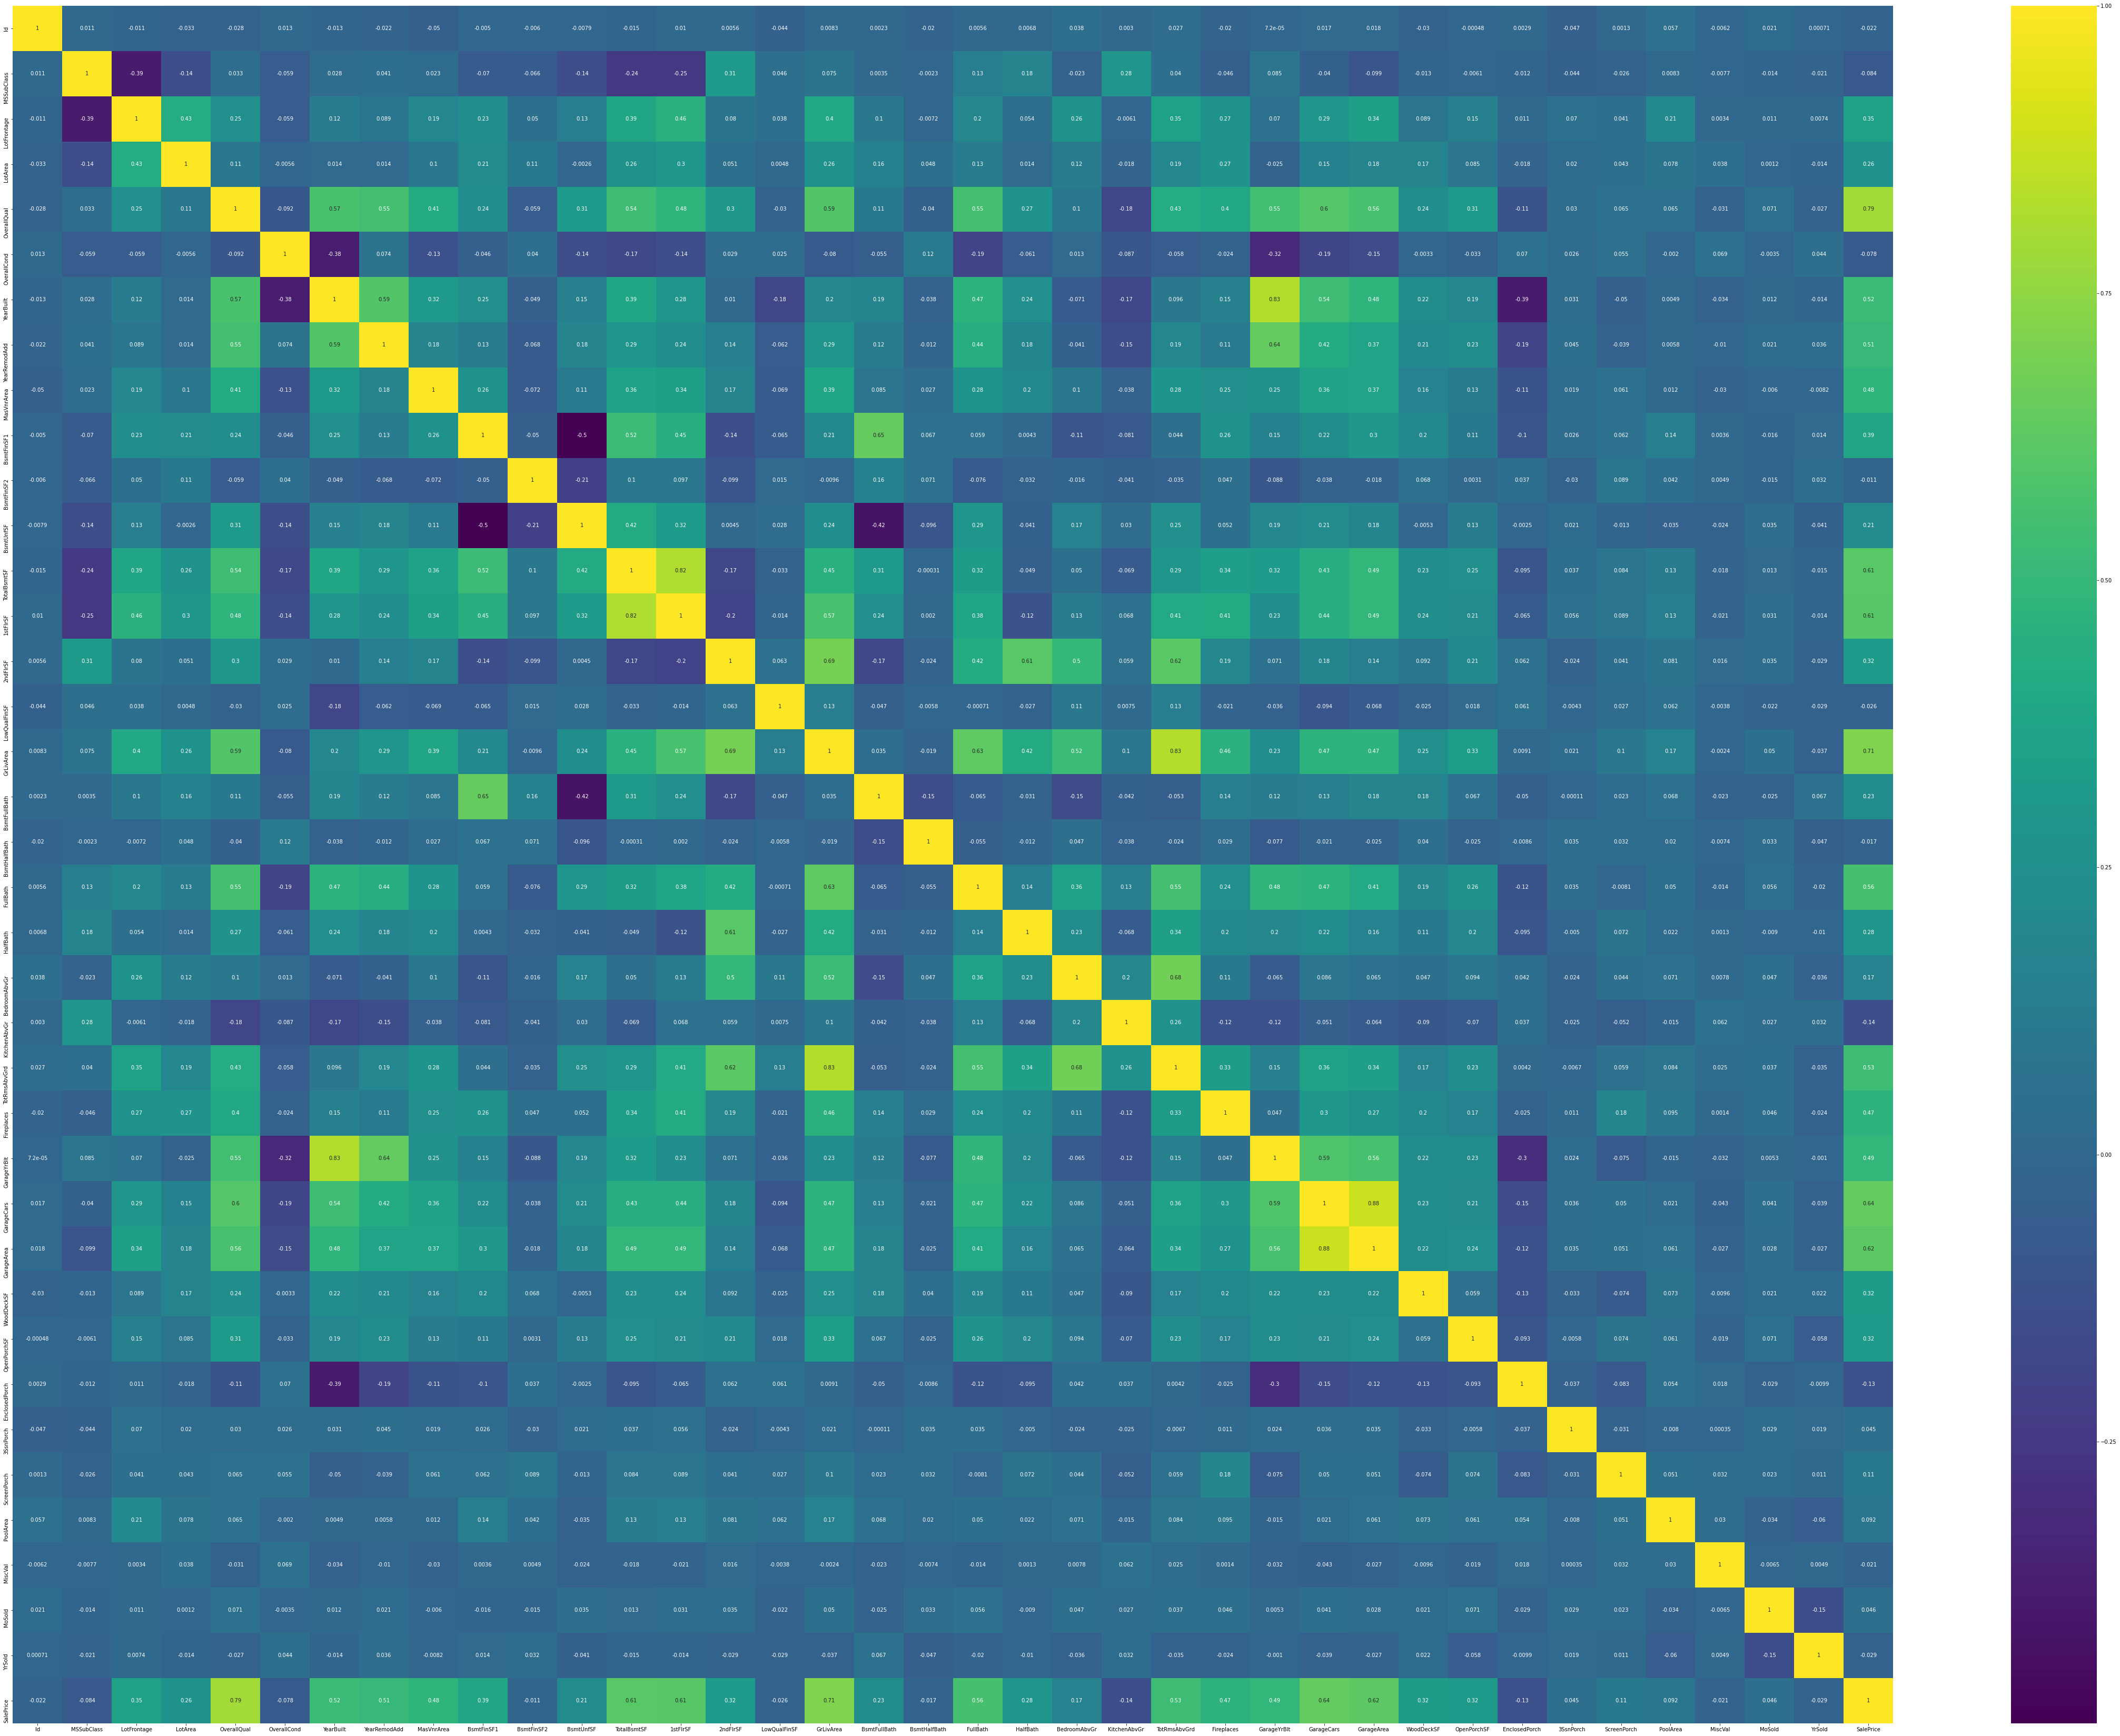

In [3]:
plt.figure(figsize=(80,60))
sns.heatmap(dataset.corr(), annot=True, annot_kws={'fontsize':10}, cmap = 'viridis')

In [41]:
dataset["FullBath"].isnull().sum()

0

In [45]:
columns = ["YearBuilt", "YearRemodAdd", "GrLivArea", "TotRmsAbvGrd", "OverallQual", "GarageArea", "GarageCars", "1stFlrSF", "TotalBsmtSF", "FullBath", "SalePrice"]

In [46]:
dataset = dataset[columns]

In [47]:
dataset.head(10)

,YearBuilt,YearRemodAdd,GrLivArea,TotRmsAbvGrd,OverallQual,GarageArea,GarageCars,1stFlrSF,TotalBsmtSF,FullBath,SalePrice
0,2003,2003,1710,8,7,548,2,856,856,2,208500
1,1976,1976,1262,6,6,460,2,1262,1262,2,181500
2,2001,2002,1786,6,7,608,2,920,920,2,223500
3,1915,1970,1717,7,7,642,3,961,756,1,140000
4,2000,2000,2198,9,8,836,3,1145,1145,2,250000
5,1993,1995,1362,5,5,480,2,796,796,1,143000
6,2004,2005,1694,7,8,636,2,1694,1686,2,307000
7,1973,1973,2090,7,7,484,2,1107,1107,2,200000
8,1931,1950,1774,8,7,468,2,1022,952,2,129900
9,1939,1950,1077,5,5,205,1,1077,991,1,118000


In [27]:
dataset.to_csv("Sale Price Prediction.csv")

In [48]:
dataset.shape

(1460, 11)

In [59]:
dataset.isnull().sum()

YearBuilt       0
YearRemodAdd    0
GrLivArea       0
TotRmsAbvGrd    0
OverallQual     0
GarageArea      0
GarageCars      0
1stFlrSF        0
TotalBsmtSF     0
FullBath        0
SalePrice       0
dtype: int64

In [49]:
X = dataset.iloc[:,0:10]
X

,YearBuilt,YearRemodAdd,GrLivArea,TotRmsAbvGrd,OverallQual,GarageArea,GarageCars,1stFlrSF,TotalBsmtSF,FullBath
0,2003,2003,1710,8,7,548,2,856,856,2
1,1976,1976,1262,6,6,460,2,1262,1262,2
2,2001,2002,1786,6,7,608,2,920,920,2
3,1915,1970,1717,7,7,642,3,961,756,1
4,2000,2000,2198,9,8,836,3,1145,1145,2
...,...,...,...,...,...,...,...,...,...,...
1455,1999,2000,1647,7,6,460,2,953,953,2
1456,1978,1988,2073,7,6,500,2,2073,1542,2
1457,1941,2006,2340,9,7,252,1,1188,1152,2
1458,1950,1996,1078,5,5,240,1,1078,1078,1


In [50]:
y = dataset['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = (train_test_split(X,y, test_size=0.2))

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [56]:
lm = LinearRegression().fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
lm.score(X_test,y_test)

0.7342669953834923

In [61]:
RF = RandomForestRegressor(random_state = 33).fit(X_train, y_train)
pred = RF.predict(X_train)
print(r2_score(y_train, pred))

# R2 score
test_pred = RF.predict(X_test)
print(r2_score(y_test, test_pred))

# Prediction
prediction = RF.predict(X_test)

0.9578666172299981
0.7589636389358172


C:\Users\Shilpi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [62]:
DT = DecisionTreeRegressor(random_state = 33).fit(X_train, y_train)
pred = DT.predict(X_train)
print(r2_score(y_train, pred))

# R2 score
test_pred = DT.predict(X_test)
print(r2_score(y_test, test_pred))

# Prediction
prediction = DT.predict(X_test)

0.9998990722267183
0.7040798176309665


In [67]:
corr = dataset[dataset.columns[1:]].corr().abs()['SalePrice'][:]
print(corr.sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64


In [68]:
columns1 = ["YearBuilt", "GrLivArea", "TotRmsAbvGrd", "OverallQual", "GarageArea", "GarageCars", "1stFlrSF", "TotalBsmtSF", "FullBath", "SalePrice"]

In [69]:
dataset = dataset[columns]

In [70]:
X = dataset.iloc[:,0:10]
X

,YearBuilt,YearRemodAdd,GrLivArea,TotRmsAbvGrd,OverallQual,GarageArea,GarageCars,1stFlrSF,TotalBsmtSF,FullBath
0,2003,2003,1710,8,7,548,2,856,856,2
1,1976,1976,1262,6,6,460,2,1262,1262,2
2,2001,2002,1786,6,7,608,2,920,920,2
3,1915,1970,1717,7,7,642,3,961,756,1
4,2000,2000,2198,9,8,836,3,1145,1145,2
...,...,...,...,...,...,...,...,...,...,...
1455,1999,2000,1647,7,6,460,2,953,953,2
1456,1978,1988,2073,7,6,500,2,2073,1542,2
1457,1941,2006,2340,9,7,252,1,1188,1152,2
1458,1950,1996,1078,5,5,240,1,1078,1078,1


In [71]:
y = dataset['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [80]:
X_train, X_test, y_train, y_test = (train_test_split(X,y, test_size=0.2))

In [81]:
lm = LinearRegression().fit(X_train,y_train)
lm.score(X_test, y_test)

0.8403343044006755

In [82]:
RF = RandomForestRegressor(random_state = 33).fit(X_train, y_train)
pred = RF.predict(X_train)
print(r2_score(y_train, pred))

# R2 score
test_pred = RF.predict(X_test)
print(r2_score(y_test, test_pred))

# Prediction
prediction = RF.predict(X_test)

0.9715632821925825
0.836931799649612


C:\Users\Shilpi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [83]:
DT = DecisionTreeRegressor(random_state = 33).fit(X_train, y_train)
pred = DT.predict(X_train)
print(r2_score(y_train, pred))

# R2 score
test_pred = DT.predict(X_test)
print(r2_score(y_test, test_pred))

# Prediction
prediction = DT.predict(X_test)

0.9999143593961435
0.7740970110440003


In [84]:
columns2 = ["GrLivArea", "TotRmsAbvGrd", "OverallQual", "GarageArea", "GarageCars", "1stFlrSF", "TotalBsmtSF", "FullBath", "SalePrice"]

In [85]:
dataset = dataset[columns]

In [86]:
X = dataset.iloc[:,0:10]
X

,YearBuilt,YearRemodAdd,GrLivArea,TotRmsAbvGrd,OverallQual,GarageArea,GarageCars,1stFlrSF,TotalBsmtSF,FullBath
0,2003,2003,1710,8,7,548,2,856,856,2
1,1976,1976,1262,6,6,460,2,1262,1262,2
2,2001,2002,1786,6,7,608,2,920,920,2
3,1915,1970,1717,7,7,642,3,961,756,1
4,2000,2000,2198,9,8,836,3,1145,1145,2
...,...,...,...,...,...,...,...,...,...,...
1455,1999,2000,1647,7,6,460,2,953,953,2
1456,1978,1988,2073,7,6,500,2,2073,1542,2
1457,1941,2006,2340,9,7,252,1,1188,1152,2
1458,1950,1996,1078,5,5,240,1,1078,1078,1


In [87]:
y = dataset['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [88]:
X_train, X_test, y_train, y_test = (train_test_split(X,y, test_size=0.2))

In [89]:
lm = LinearRegression().fit(X_train,y_train)
lm.score(X_test, y_test)

0.8104210117619771

In [90]:
RF = RandomForestRegressor(random_state = 33).fit(X_train, y_train)
pred = RF.predict(X_train)
print(r2_score(y_train, pred))

# R2 score
test_pred = RF.predict(X_test)
print(r2_score(y_test, test_pred))

# Prediction 
prediction = RF.predict(X_test)

0.9676671017046582
0.834198213477971


C:\Users\Shilpi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [91]:
columns3 = ["GrLivArea", "OverallQual", "GarageArea", "GarageCars", "1stFlrSF", "TotalBsmtSF", "FullBath", "SalePrice"]

In [92]:
dataset = dataset[columns3]

In [93]:
X = dataset.iloc[:,0:10]
X

,GrLivArea,OverallQual,GarageArea,GarageCars,1stFlrSF,TotalBsmtSF,FullBath,SalePrice
0,1710,7,548,2,856,856,2,208500
1,1262,6,460,2,1262,1262,2,181500
2,1786,7,608,2,920,920,2,223500
3,1717,7,642,3,961,756,1,140000
4,2198,8,836,3,1145,1145,2,250000
...,...,...,...,...,...,...,...,...
1455,1647,6,460,2,953,953,2,175000
1456,2073,6,500,2,2073,1542,2,210000
1457,2340,7,252,1,1188,1152,2,266500
1458,1078,5,240,1,1078,1078,1,142125


In [94]:
y = dataset['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [95]:
X_train, X_test, y_train, y_test = (train_test_split(X,y, test_size=0.2))

In [96]:
lm = LinearRegression().fit(X_train,y_train)
lm.score(X_test, y_test)

1.0

In [97]:
RFRegModel = RandomForestRegressor(random_state = 33).fit(X_train, y_train)
pred = RF.predict(X_train)
print(r2_score(y_train, pred))

# R2 score
test_pred = RF.predict(X_test)
print(r2_score(y_test, test_pred))

# Prediction
prediction = RF.predict(X_test)

0.9996718562591225
0.9997911453704099


C:\Users\Shilpi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [98]:
DT = DecisionTreeRegressor(random_state = 33).fit(X_train, y_train)
pred = DT.predict(X_train)
print(r2_score(y_train, pred))

# R2 score
test_pred = DT.predict(X_test)
print(r2_score(y_test, test_pred))

# Prediction 
prediction = DT.predict(X_test)

1.0
0.9987080999510521
